# Plotting your data and statistical thinking

## Recall the histogram

In the previous notebook, we used the histogram to visualize our data. The histogram can be useful for getting an immediate sense of what you data looks like but it has certain pitfalls and there are other visualization that are more appropriate much of the time. Let's recall the histogram by generating some binomially-distributed data and plotting it:

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

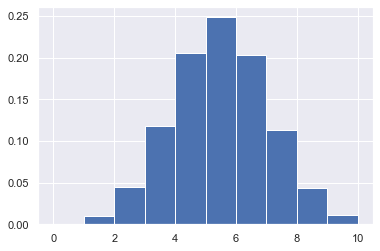

In [2]:
# Generate data & plot histogram
rng = np.random.default_rng(42)
x = rng.binomial(10, 0.5, 10000)
plt.hist(x, density=True, bins=10);

We can immediately see the range of the data, the mode, and the shape, which are good things! However, there are two immediate problems

* Looking at the histogram, we cannot easily answer intuitive and important questions, such as "can you tell me the probability of seeing 4 or more heads?"
* It isns't clear how much of what we can see is a result of the bin sizes we've chosen (known as _binning bias_).

These problems occur when we have a single univariate dataset. Histograms are more problematic when we're trying to visualize several datasets, such as control plus experiment _or_ multiple populations, which we'll get to.

Let's delve deeper into binning bias.

### Binning Bias

In the following, we generate populations from two normal distributions (bell curves) with different means, combine the datasets, and plot the resulting histogram:

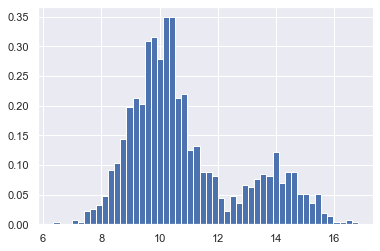

In [3]:
# Generate data & plot histogram 
rng = np.random.default_rng(42)
x1 = rng.normal(10, 1, 1000)
x2 = rng.normal(14, 1, 300)
x_all = np.concatenate((x1, x2))
plt.hist(x_all, density=True, bins=50);

Note that you can distinctly see two modes (peaks) here. However, were we to choose a different bin size, we'd only see one peak! We do see here:

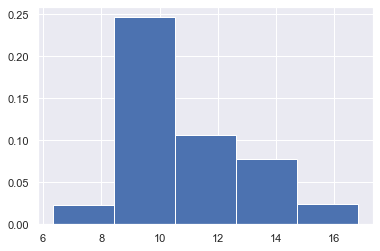

In [4]:
# Generate data & plot histogram 
rng = np.random.default_rng(42)
x1 = rng.normal(10, 1, 1000)
x2 = rng.normal(14, 1, 300)
x_all = np.concatenate((x1, x2))
plt.hist(x_all, density=True, bins=5);

On top of this, if we choose a lot more bins, the histogram begins to contain a lot more sampling noise and it isn't even clear how many actual peaks there are:

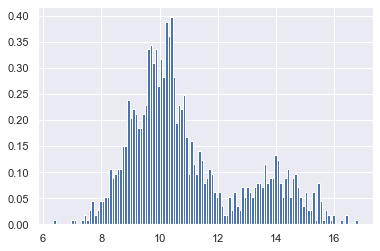

In [5]:
# Generate data & plot histogram 
rng = np.random.default_rng(42)
x1 = rng.normal(10, 1, 1000)
x2 = rng.normal(14, 1, 300)
x_all = np.concatenate((x1, x2))
plt.hist(x_all, density=True, bins=120);

Put another way, binning bias can lead to challenges with seeing multiples modes in your data, referred to as multimodality.
There are heuristics and rules-of-thumb for how many bins to use, however the point remains that the act of binning your data introduces bias into your visualizations and this bias is unnecessary as there are more appropriate tools. Before introducing such tools, let's look at plotting histograms with multiple datasets.

### Histograms and Multiple Datasets

There are many reasons to plot multiple datasets on one figure, for example, if you have

* multiple populations;
* control plus experiment (or several experiments);
* data and a model.

We'll see all of these in due course but let's consider the first case, of having multiple populations. We'll be working with the Gapminder dataset, which we encountered in Chapter 2.

In [6]:
from gapminder import gapminder as df
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
## Create individual dataframes for specific years
df_52 = df[df["year"]==1952]
df_62 = df[df["year"]==1962]
df_72 = df[df["year"]==1972]
df_82 = df[df["year"]==1982]
df_92 = df[df["year"]==1992]

Let's now plot the histogram of life expectancies around the globe for the year 1952:

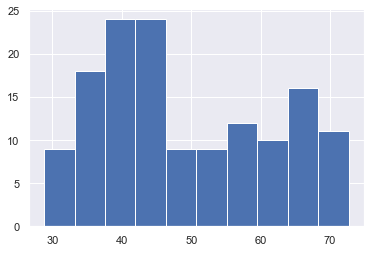

In [8]:
plt.hist(df_52['lifeExp']);

An obvious question to ask is if this distribution changes over time. In an effor to answer this question, let's plot the histograms for 1952 and 1962 on the same figure:

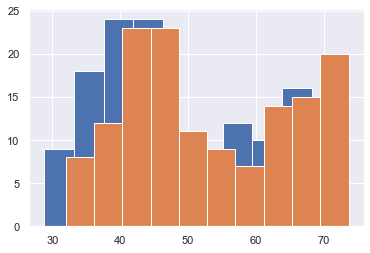

In [9]:
plt.hist(df_52['lifeExp']);
plt.hist(df_62['lifeExp']);

As the 1962 histogram covers much of the 1952 histogram, we can add transparency to the figures to counter this:

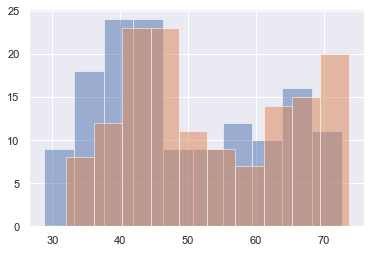

In [10]:
plt.hist(df_52['lifeExp'], alpha=0.5);
plt.hist(df_62['lifeExp'], alpha=0.5);

Although we can see the trend (which is good!), neither of these figures are particularly attractive and the situation gets worse as we plot the histograms for more years:

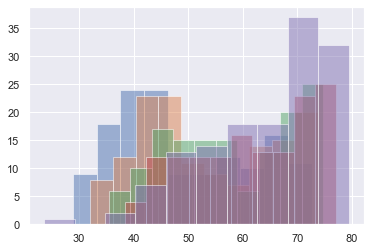

In [11]:
plt.hist(df_52['lifeExp'], alpha=0.5);
plt.hist(df_62['lifeExp'], alpha=0.5);
plt.hist(df_72['lifeExp'], alpha=0.5);
plt.hist(df_82['lifeExp'], alpha=0.5);
plt.hist(df_92['lifeExp'], alpha=0.5);

In this case, the histograms are almost useless!

Similarly, let's say that we had a control plus experiment and wanted to visualize them together. We'd end up with exactly the same issue when attempting to plot histograms: 

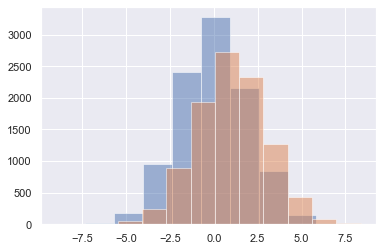

In [12]:
# generate control data
control = np.random.normal(0, 2, 10**4)
# generate experiment data
experiment = np.random.normal(1, 2, 10**4)
# plot both
plt.hist(control, alpha=0.5);
plt.hist(experiment, alpha = 0.5);

We have exactly the same issue as above and this is merely with a single experiment. Often, we will want to plot the results of several experiments together!

Having recognized the limitations of the histogram, it's now time to introduce the empirical cumulative distribution function (ECDF), which solves for all the issues we've encountered with the histogram.

## Empirical cumulative distribution functions (ECDFs)

An ECDF is, as an alternative to a histogram, a way to visualize univariate data that is rich in information. It allows us to visualize all of our data and, by doing so, avoids the very real problem of binning bias.

On top of this, you can plot

- Control plus experiment, 
- data plus model,
- many populations.

You can also see multimodality and read off a great deal of important information that histograms do not easily provide, such as percentiles.

We encountered the ECDF in passing in Chapter 2 and let's recall the definition:

**Definition:** In an ECDF, the x-axis is the range of possible values for the data & for any given x-value, the corresponding y-value is the proportion of data points less than or equal to that x-value.

Let's define a handy ECDF function that takes in data and outputs $x$ and $y$ data for the ECDF.

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

In future chapters, we'll import of ECDF function from a script of utility functions as follows:
```
from generative_thinking.utils import ecdf
```
Let's now see how the ECDF can help with the challenges described above.

### Reading off percentiles

Recall the question we asked when looking at the following histogram: "what is the probability of seeing 4 or more heads?"

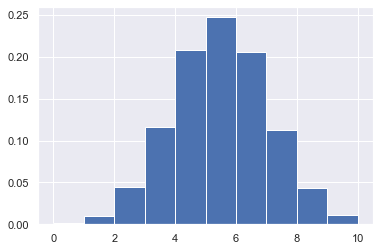

In [14]:
# Generate data & plot histogram 
x = rng.binomial(10, 0.5, 10000)
plt.hist(x, density=True, bins=10);

To answer this question, we really need to squint, approximate the height of several boxes, and add up those values. Let's now plot the ECDF:

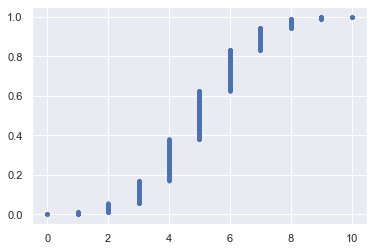

In [15]:
# Generate x- and y-data for the ECDF
x_flips, y_flips = ecdf(x)

# Plot the ECDF
plt.plot(x_flips, y_flips, marker='.', linestyle='none');

Recalling that, in an ECDF, for any given x-value, the corresponding y-value is the proportion of data points less than or equal to that x-value, we can read off immediately that 80% of the data contains 4 or more heads, meaning that the probability of seeing 4 or more heads is approximately 80%. 

More generally, we can immediately read off percentiles from the ECDF! We do so by finding the value on the x-axis that corresponds to any given percentile on the y-axis. For example, the 50% percentile (or median) is 5, the 25th percentile 4, and the 75th percentile 6.

### Multimodality

As we saw above, histograms require binning and this can result in binning bias. The following two histograms are of the same data with a different number of bins:

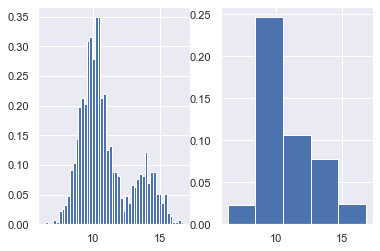

In [16]:
rng = np.random.default_rng(42)

# Generate data & plot histogram 
x1 = rng.normal(10, 1, 1000)
x2 = rng.normal(14, 1, 300)
x_all = np.concatenate((x1, x2))
plt.subplot(1, 2, 1)
plt.hist(x_all, density=True, bins=50);
plt.subplot(1, 2, 2)
plt.hist(x_all, density=True, bins=5);

There is no binning bias with the ECDF, as it plots ALL of your data. Let's see it in action for the above dataset:

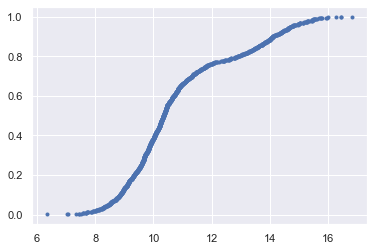

In [17]:
# Generate x- and y-data for the ECDF
x_flips, y_flips = ecdf(x_all)

# Plot the ECDF
plt.plot(x_flips, y_flips, marker='.', linestyle='none');

Now the question remains: can we see multiple peaks here? The answer is yes but we need to recognize that the peaks in histograms turn into points of inflection in ECDFs (recall that a point of inflection is when a curve changes from being concave up to concave down or vice versa). This is a result of the fact that the ECDF is the cumulative sum of the histogram.

We can see points of inflection at around x=10 and x=14 in the above ECDF, which correspond to the modes of the data we generated! Note that the points of inflection are less pronounced than the peaks in the histogram (well, at least in the one in which they are visible) but this is the price we necessarily pay for being able to visualize all of our data free of binning bias.

### Control + experiment

Let's now see how we can plot multiple ECDFs together. Above, we tried to plot control and experiment histograms together, to limited success:




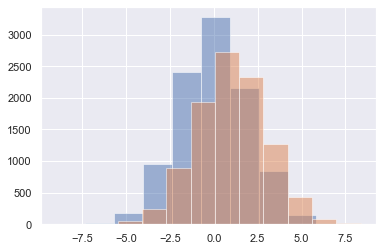

In [18]:
plt.hist(control, alpha=0.5);
plt.hist(experiment, alpha = 0.5);

Let's now plot the ECDFs on the same figure:

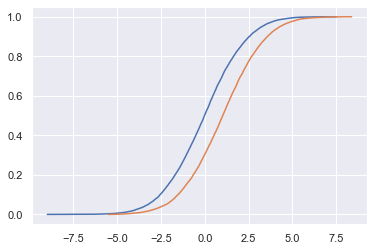

In [19]:
x_c, y_c = ecdf(control)
x_e, y_e = ecdf(experiment)
plt.plot(x_c, y_c)
plt.plot(x_e, y_e);

We can immediately see the differences between the control and the experiment, including the percentiles and the modes (remember, points of inflection). We can also see that the variances of both are around the same.

### Multiple populations

Let's now try our hand at plotting the ECDFs for multiple populations. We'll use the Gapminder life expectancy example once again:

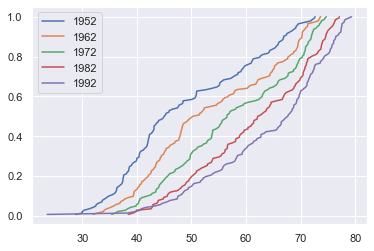

In [20]:
# Create data for ECDFs
x_lifeExp52, y_lifeExp52 = ecdf(df_52["lifeExp"])
x_lifeExp62, y_lifeExp62 = ecdf(df_62["lifeExp"])
x_lifeExp72, y_lifeExp72 = ecdf(df_72["lifeExp"])
x_lifeExp82, y_lifeExp82 = ecdf(df_82["lifeExp"])
x_lifeExp92, y_lifeExp92 = ecdf(df_92["lifeExp"])
# Plot ECDFs
plt.plot(x_lifeExp52, y_lifeExp52, label='1952');
plt.plot(x_lifeExp62, y_lifeExp62, label='1962');
plt.plot(x_lifeExp72, y_lifeExp72, label='1972');
plt.plot(x_lifeExp82, y_lifeExp82, label='1982');
plt.plot(x_lifeExp92, y_lifeExp92, label='1992');
#plt.xscale("log");
plt.legend();

We can see the data for each year distinctly, along with being able to see the trend of life expectancy increasing over time!
We also mentioned that ECDFs are good for plotting data alongside a model and we'll see how to do this in the next chapter. Before moving on to this, let's look at a selection of other statistical plots that are useful.

## Other types of statistical plots

### Swarmplots

Swarmplots (or beeswarm plots), which we briefly encountered earlier, are another way of plotting all of your data points: the y-axis is the variable of interest and the x-axis is used to spread out the data so that it is all visible. Let's see a swarmplot in action for our 1952 life expectancy data:

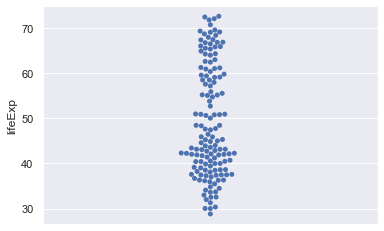

In [21]:
sns.swarmplot(y="lifeExp", data=df_52);

We can also use the x-axis to encode a categorical variable. Let's do this now with the above data and the variable 'Continent':

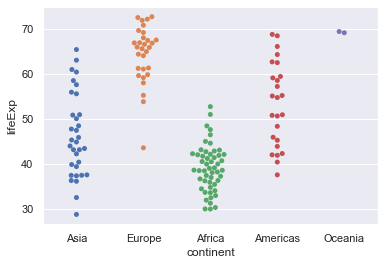

In [22]:
sns.swarmplot(x="continent", y="lifeExp", data=df_52);

### Box plots

Box plots (or box and whisker plots) are in a similar vein to swarmplots, but they do not plot of your data. Rather, they encode summary statistics, such as percentiles and outliers. 

The line in the middle of each box corresponds to the median of the relevant data, the top and bottom of the box to the 75th and 25th percentiles respectively (also called the 3rd and 1st quartiles, $Q_3$ and $Q_1$, respectively), and the whiskers to the median plus or minus 1.5 times the Interquartile Range ($IQR=Q_3-Q_1$).

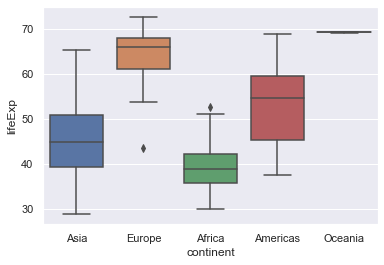

In [23]:
sns.boxplot(x="continent", y="lifeExp", data=df_52);

### Kernel density estimations



Kernel density estimation (KDE) is a method used to create a "smooth version of a histogram." The intention is often to get a sense of what the underlying probability distribution could look like. Consider the following histogram of life expectancies for countries in 1952:

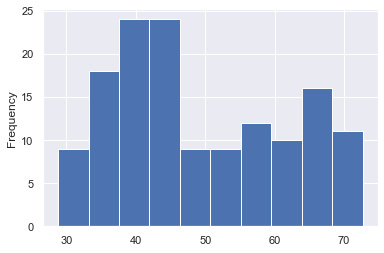

In [24]:
df_52["lifeExp"].plot.hist();

A corresponding KDE would look like this:

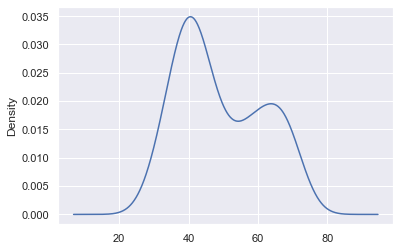

In [25]:
df_52["lifeExp"].plot.kde();

Having introduced box plots and KDEs, it is worth mentioning that we can combine them into what is know as a violin plot!

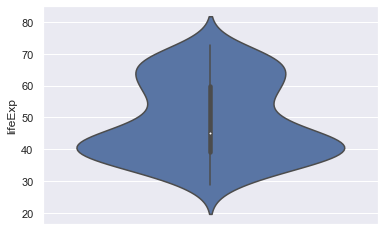

In [26]:
sns.violinplot(y="lifeExp", data=df_52);

## Wrapping up

In this notebook, we have introduced the empirical cumulative distribution function, a method of visualizing our data that avoids many of the pitfalls of histograms. The ECDF will be of great utility in plotting our data and models in the rest of this book and we hope that you'll find it useful in your work! We've also introduced several other visualization tools, such as the swarm plot, the box plot, and kernel density estimation.